<h1 style="color:#4FC3F7;">0. INTRODUCCIÓN </h1>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

<h2 style="color:#81C784;">0.1 Comparación necesaria con el primer proyecto de esta tarea -  A2B</h2>


Creo muy necesario explicar claras diferencias y responder a preguntas que me surgieron al iniciar con esta segunda parte de la actividad **A2B**.

El objetivo del proyecto anterior era la de agrupar imágenes de rostros sin usar las etiquetas y observar si K-Means lograba agrupar rostros similares. Era un clustering exploratorio. Para ese proyecto hicimos uso del algoritmo <span style="color:#FFEB3B; font-weight:bold;">K-Means</span> el cual tiene como características principales las siguientes: es un modelo geométrico y usa distancias euclidianas *(solo resta, eleva al cuadrado y suma)*. Además no aprende probabilidades y no tiene la capacidad de generar imágenes nuevas, tampoco puede detectar anomalías de forma natural. K-Means solo responde a la siguiente pregunta: "¿Que imagenes estan cerca entre si en el espacio?". 

En este caso no fue necesario aplicar <span style="color:#FFEB3B; font-weight:bold;">PCA</span> a los datos porque K-Means sí puede funcionar en altas dimensiones, además es computacionalmente más simple que toro algoritmo no supervisado. No intentó aprender relaciones entre dimensiones, trata cada dimensión de forma independiente. Y una cosa muy interesante es que <span style="color:#FFEB3B; font-weight:bold;">asume implícitamente clusters esféricos</span>.  Tambien se trató de un dataset pequeño (400 imágenes). Aunque PCA hubiera ayudado, no era obligatorio para que K-Means funcionara.

Ahora hablemos de otro algoritmo no supervisado llamado <span style="color:#FFEB3B; font-weight:bold;">Gaussian mixture model (GMM)</span>

EL DOCUMENTO DE CLASE LO EXPLICA MUY BIEN, ACA SEREMOS MAS DIRECTOS Y DIDACTICOS

Un Gaussian Mixture Model (GMM) no intenta agrupar datos por cercanía geométrica, como lo hace K-Means. En su lugar, su objetivo es modelar la distribución probabilística completa de los datos. Es decir, el GMM responde a la pregunta: "¿Qué tan probable es observar este dato bajo el modelo estadístico que he aprendido?"

Para lograr esto, el GMM asume que los datos fueron generados por una combinación (mezcla) de varias distribuciones gaussianas. Cada una de estas gaussianas representa una "forma" posible de los datos y el modelo completo es la suma ponderada de todas ellas. Matemáticamente esto se expresa como una suma de probabilidades donde cada término corresponde a una gaussiana con su propia media y su propia matriz de covarianza. (Esto es muy raro)

Lo importante aquí es que el GMM no asigna puntos a un clúster de forma rígida, sino que evalúa probabilidades. Un mismo rostro puede tener cierta probabilidad de pertenecer a varias gaussianas al mismo tiempo. Esto ya marca una diferencia conceptual abismal con K-Means.

Cada gaussiana dentro del GMM está completamente definida por dos objetos matemáticos:
una <span style="color:#FFEB3B; font-weight:bold;">media</span> y una <span style="color:#FFEB3B; font-weight:bold;">matriz de covarianza</span>.

La media indica el “rostro promedio” que representa esa gaussiana. En el caso del conjunto de datos de Olivetti cada imagen tiene 64 × 64 píxeles, lo que equivale a 4096 dimensiones. Por lo tanto, la media de una sola gaussiana ya es un vector de 4096 valores.

La covarianza en cambio es una matriz que describe cómo varían conjuntamente los píxeles entre sí. Se trata de estructura. En una imagen de rostro, muchos píxeles no son independientes, con esto nos referimos a por ejemplo cuando cambia la iluminación de un cachete cambia también la del ojo cercano o cuando la cabeza se inclina, varios bordes se mueven al mismo tiempo. Todo ese comportamiento en conjunto queda codificado en la covarianza.

**Por eso se dice que la covarianza captura la forma, orientación, alargamiento de los datos en el espacio. Mientras K-Means asume clústeres esféricos, el GMM puede aprender clústeres alargados, inclinados y correlacionados.**

<span style="color:#FFEB3B; font-weight:bold;"> ¿Pero que pasa con la matriz de covarianza y que relacion tiene con el PCA?</span>

En un espacio de 4096 dimensiones, la matriz de covarianza posee $\frac{4096(4096+1)}{2} \approx 8.4 \times 10^6$ parámetros independientes. Esta complejidad estructural impide una estimación fiable cuando el número de muestras disponibles es escaso.

Y por desgracia, el conjunto de datos de Olivetti contiene solo 400 imágenes. Esto significa que estamos intentando estimar millones de parámetros a partir de unas pocas muestras. Aca sale a la luz un termino llamado <span style="color:#FFEB3B; font-weight:bold;"> matriz casi singular </span>

Para evaluar la probabilidad de un punto bajo una gaussiana *(significa una campana de probabilidad que describe qué valores son más probables y cuáles menos.*), el GMM debe calcular una expresión que involucra la <span style="color:#FFEB3B; font-weight:bold;"> inversa de la matriz de covarianza</span> y <span style="color:#FFEB3B; font-weight:bold;"> su determinante</span>. 

*Para saber qué tan probable es un punto, el modelo necesita mirar qué tan lejos está del centro (**usa la inversa de la covarianza**) y qué tan grande es la campana (**usa el determinante**). Por eso esos dos términos aparecen en la fórmula: sirven para medir distancia y escala de esa campana de probabilidad.* ESTO ES MUY CONFUSO ASI QUE DE ACUERDO A NUESTRO PROYECTO la probabilidad significa: *Qué tan probable es que una imagen de rostro pertenezca al conjunto de rostros "normales" que el modelo aprendió.*

El GMM aprende cómo se ven normalmente las caras del dataset Olivetti: formas, sombras, posiciones de ojos, nariz, boca, etc. **Cada gaussiana representa una forma típica de rostro.**

Es por eso que la covarianza es muy importante. A medida que aumenta el número de dimensiones el volumen del espacio crece de forma exponencial y los datos que tenemops se vuelven extremadamente dispersos.

<span style="color:#FFEB3B; font-weight:bold;"> Aquí es donde entra PCA,</span> como una condición necesaria para que el GMM funcione.

PCA realiza una rotación del espacio de datos hacia las direcciones donde realmente existe varianza significativa. En lugar de trabajar con 4096 píxeles muy correlacionados (o sea de valores muy cercanos), PCA construye un espacio de menor dimensión, de unas 100–200 dimensiones.

K-Means no sufre ninguno de estos problemas porque no estima covarianzas ni trabaja con probabilidades. Solo calcula distancias euclidianas y promedios. Asume que todos los clústeres son esféricos y de igual tamaño. Esa simplicidad lo hace mucho más robusto en alta dimensión, pero también mucho más limitado.

**Mientras K-Means puede agrupar rostros de forma aproximada, no puede generar nuevos rostros ni detectar anomalías. El GMM sí puede hacerlo pero solo si se le prepara el terreno adecuadamente con PCA.**

<h1 style="color:#4FC3F7;">1. ¿QUÉ SE PIDE EXACTAMENTE EN ESTE PROYECTO?</h1>

<h2 style="color:#81C784;">1.1 Descripción</h2>


Este proyecto se centra en entrenar un Modelo de Mezcla Gaussiana (GMM) sobre el conjunto de datos de rostros de Olivetti, evaluando la capacidad de trabajar con un modelo probabilístico y no solo con métodos geométricos de agrupamiento. Entrenar un GMM implica aprender qué es una distribución de probabilidad que describirá cómo se distribuyen los rostros, estimando medias, covarianzas y pesos de mezcla mediante el algoritmo <span style="color:#FFEB3B; font-weight:bold;"> Expectation–Maximization (EM)</span>. El objetivo no es simplemente agrupar imágenes sino modelar estadísticamente la estructura de los rostros, lo que permite tanto evaluar la probabilidad de nuevas imágenes como generar ejemplos.

Dado que cada imagen tiene 4096 dimensiones, el uso de PCA se vuelve una necesidad práctica para reducir la dimensionalidad, acelerar el entrenamiento y evitar problemas numéricos o sobreajustes, manteniendo el 99 % de la varianza para conservar la información visual relevante. Una vez entrenado, el GMM puede generar nuevos rostros mediante muestreo (con el método `sample()`) y si se usó PCA, reconstruirlos al espacio original con `inverse_transform()`. Finalmente, al modificar imágenes (rotarlas, voltearlas u oscurecerlas) y comparar los valores de `score_samples()` entre imágenes normales y alteradas, el modelo se utiliza para detección de anomalías evaluando qué tan bien cada imagen se ajusta a la distribución de rostros aprendida.

<h1 style="color:#4FC3F7;">1. Análisis de la libreria </h1>

El proyecto anterior ya cubría de forma sólida todo lo relacionado con el dataset, la conversión a vectores de 4096 dimensiones, el hecho de que existen 40 personas con 10 imágenes cada una. Por eso no volvemos a justificar desde cero estas decisiones, las damos por establecidas y correctamente implementadas.

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

# Carga del dataset Olivetti
olivetti = fetch_olivetti_faces()
X = olivetti.data      # (400, 4096)
y = olivetti.target   # etiquetas reales (no usadas en clustering)

# Verificación rápida
print(X.shape)


(400, 4096)


Este código carga el dataset, prepara la matriz de datos y deja listo el entorno para análisis no supervisado. Lo incluimos para que el flujo del nuevo proyecto sea coherente, pero conceptualmente esto ya fue hecho.

Cada imagen es un punto en un espacio de 4096 dimensiones, ya escalado entre 0 y 1, lo cual hace que el dataset sea especialmente complejo para modelos probabilísticos (0 y 1 unicamente :c), pero aún manejable para métodos geométricos como K-Means.

Mientras que en el proyecto previo el objetivo era observar agrupamientos y visualizar similitudes, ahora el enunciado pide modelar la distribución de probabilidad de los rostros, generar nuevas caras y detectar anomalías basándose en densidad, lo cual no puede hacerse con K-Means.

<h1 style="color:#4FC3F7;">2. Reducción de dimensionalidad con PCA (condición necesaria para GMM) </h1>

Como ya vimos anteriormente, cada imagen puede representarse como un punto en un espacio de 4096 dimensiones. En este contexto, entrenar un GMM con covarianzas completas implicaría estimar, para cada componente, una matriz de covarianza de tamaño 4096 × 4096, lo cual resulta impracticable si solo se dispone de 400 imágenes para el entrenamiento.

Aquí es donde entra PCA como una transformación que rota el espacio original a un sistema de coordenadas donde la varianza de los datos está concentrada en muchas menos dimensiones, eliminando direcciones dominadas por ruido o redundancia. En el archivo llamado <span style="color:#FFEB3B; font-weight:bold;"> 2_3_2_classification_algorithms se hace uso del concepto PCA </span>. En esa ocasión de paso de un plano 4D a uno 2D mencionando un concepto muy importante: <span style="color:#FFEB3B; font-weight:bold;"> PCA rota el sistema de ejes para describir nuestros mismos datos con menos columnas, conservando la mayor información posible. </span>. 

Tambien citaré un texto que se realizó en el archivo de *2_6_unsupervised* que creo importante para enriquecer mas la explicación de PCA: <span style="color:#FFEB3B; font-weight:bold;"> PCA permite trabajar en un espacio ortogonal, estable y de baja dimensión, donde la estimación probabilística de un GMM sí tiene sentido</span>

Desde un punto de vista conceptual, al aplicar PCA sobre imágenes de rostros no se eliminan "caras" como tal sino que se sustituye la información de píxeles individuales por componentes más globales del rostro como la iluminación, la forma general, la orientación de la cabeza, el contraste y otros rasgos importantes. 

Y esto nos lleva a la conclusión más importante: **GMM no va a modelar píxeles aislados, sino combinaciones que tienen sentid. Como las de los rasgos**

In [ ]:
from sklearn.decomposition import PCA

# PCA conservando el 99% de la varianza
pca = PCA(n_components=0.99, random_state=42)
X_pca = pca.fit_transform(X)

print(X.shape, "\n")
print(X_pca.shape,"\n")
print(X, "\n\n")
print(X_pca)



(400, 4096) 

(400, 260) 

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]] 


[[ 6.432596    0.7036756  -1.4300253  ... -0.06897271 -0.13006711
  -0.16854866]
 [ 1.0759081   6.6973243   1.8428108  ...  0.02724933 -0.07037514
   0.07683304]
 [ 5.292951    1.5425035   0.22595699 ...  0.1383287  -0.05144971
   0.06331789]
 ...
 [-2.0407636   1.5096129   3.4487345  ... -0.08767644  0.08620754
   0.01713805]
 [ 5.165221   -8.096765   -0.67100596 ...  0.0919885  -0.08986487
  -0.02437576]
 [ 1.1505014  -2.4350345   1.1894945  ... -0.03528152  0.01011934
  -0.01756253]]


Esta de mas pero gracias al codigo `n_components=0.99` se está conservando el 99% de la varianza

En esta ocasión imprimi 2 variables muy importantes:
- `X.shape` = `(400, 4096)` = 400 filas (400 imagenes) y 4096 columnas (4096 pixeles por imagen 64 x 64, solo que estan aplanados, lo mismo se siempre xd)
- `X_pca.shape` = `(400, 260)` = 400 filas (400 imagenes) y 260 columnas (ajajajaj, casi nada)

A partir de aquí cada punto ya no representa "4096 píxeles" sino una **combinación lineal de componentes faciales estadísticamente independientes** (buena frase), o sea que un solo punto nos enseña mas que miles.

Las otras impresiones son son para mostrar la matriz antes y despues de la transformación, PEROOOO, esperen un momento, <span style="color:#FFEB3B; font-weight:bold;"> la matriz `X_pca`, o sea la dimensionada, ya no tiene sus valores de 0 a 1???????.</span>. Porque esto pasa con PCA y no con <span style="color:#FFEB3B; font-weight:bold;"> MinMaxScaler</span> o <span style="color:#FFEB3B; font-weight:bold;"> StandardScaler??????</span>.

*Esto ocurre porque el escalado se aplica únicamente a las variables originales, mientras que PCA transforma esos datos a un nuevo sistema de coordenadas. Es decir, antes cada fila representaba una imagen descrita por pixeles escalados pero después de PCA cada fila representa la posición de esa imagen en un espacio nuevo definido por los componentes principales.*

**Según chat gpt esto no afecta al desarrollo del algoritmo, por temas de tiempo no profundizare en esto, pero me resultó muy interesante.**



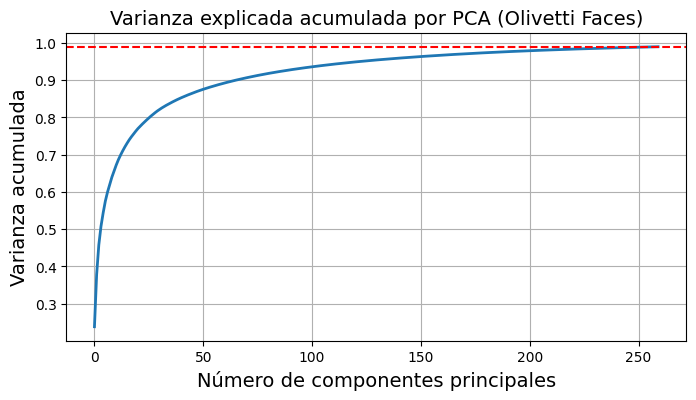

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
plt.axhline(0.99, color="r", linestyle="--")
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza acumulada")
plt.title("Varianza explicada acumulada por PCA (Olivetti Faces)")
plt.grid()
plt.show()


Cuando se aplica PCA con `pca.fit_transform(X)`, lo que se hace básicamente es buscar nuevas formas de describir las imágenes que sean más eficientes que usar todos los píxeles uno por uno. En lugar de trabajar directamente con las 4096 intensidades, PCA encuentra combinaciones de ellas que capturan los patrones más importantes de los rostros. Esa información se resume en `pca.explained_variance_ratio_`, que indica qué tan relevante es cada componente respecto al conjunto total de imágenes.

Luego, al usar `np.cumsum(pca.explained_variance_ratio_)`, se puede ver cuánta información se va acumulando a medida que se añaden más componentes. La gráfica muestra que al inicio la curva sube rápido, lo que significa que con pocos componentes ya se explica gran parte del dataset, y después se va aplanando. La línea en 0.99 simplemente marca un punto de referencia para decidir cuántos componentes usar sin perder información importante. No es un valor que esta de mas sino una forma visual de justificar nuestra elección.

Esta reducción es importante porque el modelo que se va a usar después no funciona bien en espacios muy grandes. En proyectos anteriores con K-Means esto no era tan importante, ya que ese algoritmo solo compara distancias. En cambio, el GMM necesita modelar cómo se distribuyen los datos, y hacerlo con miles de dimensiones y pocas imágenes no es práctico. Por eso una vez que los datos se proyectan con pca.transform, todo el trabajo se hace en ese nuevo espacio reducido, y solo se vuelve al espacio original cuando hace falta mostrar imágenes usando `inverse_transform`.

Se puede ver que efectivamente el numero de componentes principales para un 99% de varianza es de 260 :D. Tal y como mostramos anteriormente `X_pca.shape`

<h1 style="color:#4FC3F7;">3. Entrenamiento del Gaussian Mixture Model (GMM) en el espacio PCA </h1>

Después de aplicar PCA, cada rostro ya no se describe por 4096 de píxeles muy relacionados entre sí, sino por un número reducido de componentes que representan las principales formas en que varían los rostros del dataset. En este nuevo espacio los valores pueden ser positivos o negativos y los datos están centrados alrededor de cero, ya que ya no se trabaja con intensidades de píxeles sino con desviaciones respecto al rostro promedio. Además las fuertes correlaciones entre dimensiones se eliminan lo que facilita el trabajo de modelos estadístico como lo es GMM.

Esto es fundamental para el GMM ya que a diferencia de K-Means no se limita a agrupar puntos por cercanía, sino que intenta modelar la distribución completa de los datos.

<h2 style="color:#81C784;">3.1 ¿En que cosiste entrenar un GMM?</h2>

Entrenar un <span style="color:#FFEB3B; font-weight:bold;"> GMM </span> consiste en usar el algoritmo  <span style="color:#FFEB3B; font-weight:bold;"> EM </span> que funciona como un proceso iterativo de ajuste

Cuando se habla de "gaussianas" en un GMM no se está hablando de personas ni de clases, sino de nubes de puntos en el espacio PCA. Cada gaussiana describe una región donde los datos tienden a concentrarse, tiene un **centro (la media)**, **una forma** y **orientación (la covarianza)** y **una importancia relativa (el peso)**. La idea es que el conjunto completo de rostros no forma una sola nube sino varias nubes superpuestas y el GMM intente aprender cómo son y dónde están esas nubes.

Entrenar el GMM significa ajustar esas nubes para que expliquen lo mejor posible los datos. Esto se hace con el algoritmo <span style="color:#FFEB3B; font-weight:bold;"> EM </span>. Primero en la <span style="color:#FFEB3B; font-weight:bold;"> fase EM </span> el modelo mira cada rostro en `X_pca` y calcula qué tanto encaja en cada una de las nubes. No elige una sola sino que asigna probabilidades. Luego en la <span style="color:#FFEB3B; font-weight:bold;"> fase M </span> usa esas probabilidades para mover los centros de las nubes y ajustar su forma de manera que expliquen mejor el conjunto completo de imágenes. Este proceso se repite varias veces hasta que el modelo deja de mejorar.

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(
    n_components=40,
    covariance_type="full",
    random_state=42,
    n_init=5
)

gmm.fit(X_pca)  


,"n_components n_components: int, default=1The number of mixture components.",40
,"covariance_type covariance_type: {'full', 'tied', 'diag', 'spherical'}, default='full'String describing the type of covariance parameters to use.Must be one of:- 'full': each component has its own general covariance matrix.- 'tied': all components share the same general covariance matrix.- 'diag': each component has its own diagonal covariance matrix.- 'spherical': each component has its own single variance.For an example of using `covariance_type`, refer to:ref:`sphx_glr_auto_examples_mixture_plot_gmm_selection.py`.",'full'
,"tol tol: float, default=1e-3The convergence threshold. EM iterations will stop when thelower bound average gain is below this threshold.",0.001
,"reg_covar reg_covar: float, default=1e-6Non-negative regularization added to the diagonal of covariance.Allows to assure that the covariance matrices are all positive.",1e-06
,"max_iter max_iter: int, default=100The number of EM iterations to perform.",100
,"n_init n_init: int, default=1The number of initializations to perform. The best results are kept.",5
,"init_params init_params: {'kmeans', 'k-means++', 'random', 'random_from_data'}, default='kmeans'The method used to initialize the weights, the means and theprecisions.String must be one of:- 'kmeans' : responsibilities are initialized using kmeans.- 'k-means++' : use the k-means++ method to initialize.- 'random' : responsibilities are initialized randomly.- 'random_from_data' : initial means are randomly selected data points... versionchanged:: v1.1 `init_params` now accepts 'random_from_data' and 'k-means++' as initialization methods.",'kmeans'
,"weights_init weights_init: array-like of shape (n_components, ), default=NoneThe user-provided initial weights.If it is None, weights are initialized using the `init_params` method.",None
,"means_init means_init: array-like of shape (n_components, n_features), default=NoneThe user-provided initial means,If it is None, means are initialized using the `init_params` method.",None
,"precisions_init precisions_init: array-like, default=NoneThe user-provided initial precisions (inverse of the covariancematrices).If it is None, precisions are initialized using the 'init_params'method.The shape depends on 'covariance_type':: (n_components,) if 'spherical', (n_features, n_features) if 'tied', (n_components, n_features) if 'diag', (n_components, n_features, n_features) if 'full'",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given to the method chosen to initialize theparameters (see `init_params`).In addition, it controls the generation of random samples from thefitted distribution (see the method `sample`).Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


En el código se crea el modelo. El parámetro `n_components = 40` <span style="color:#FFEB3B; font-weight:bold;">  indica cuántas nubes distintas se van a usar para describir el espacio de rostros </span>. Ese número no tiene por qué coincidir con el número real de personas porque aquí no se busca reconocer identidades sino capturar patrones generales.  De hecho, elegir este número es parte del análisis y se suele explorar usando la <span style="color:#FFEB3B; font-weight:bold;"> log-verosimilitud </span>, el <span style="color:#FFEB3B; font-weight:bold;"> BIC</span> o el <span style="color:#FFEB3B; font-weight:bold;"> AIC</span> que penalizan modelos demasiado complejos.

`covariance_type = "full"` permite que cada nube tenga su propia forma y orientación lo que hace al modelo más flexible. `n_init = 5` significa que el entrenamiento se intenta varias veces desde distintos puntos iniciales para evitar malas soluciones. Y `random_state = 42` solo asegura que los resultados se puedan reproducir.

Cuando se ejecuta `gmm.fit(X_pca)` el modelo aprende todas esas nubes a partir de los datos en el espacio PCA. A partir de este momento el GMM ya no solo agrupa sino que define una distribución de probabilidad sobre el espacio de las caras del data set, es decir, aprende qué regiones son comunes y cuáles son "raras". <span style="color:#FFEB3B; font-weight:bold;"> Es por eso que luego se pueden evaluar probabilidades, generar nuevos rostros o detectar anomalías.</span> 

Esto quiere decir que este codigito`gmm.predict(X_pca)` asigna a cada rostro el índice de la nube que le resulta más probable.

Entonces el modelo aprendió cómo se distribuyen los rostros dentro del espacio PCA. Esto significa que ahora conoce qué regiones del espacio son más comunes y cuáles son poco frecuentes. A diferencia de K-Means, el GMM no solo asigna grupos, sino que modela qué tan probable es que un rostro aparezca en cada zona del espacio.

Cuando el GMM ya está entrenado, lo único que queremos hacer con ese código es dibujar los datos para tener una idea visual de cómo el modelo está organizando los rostros. No estamos haciendo nada nuevo ni complicado, solo estamos mirando el resultado de una forma gráfica.

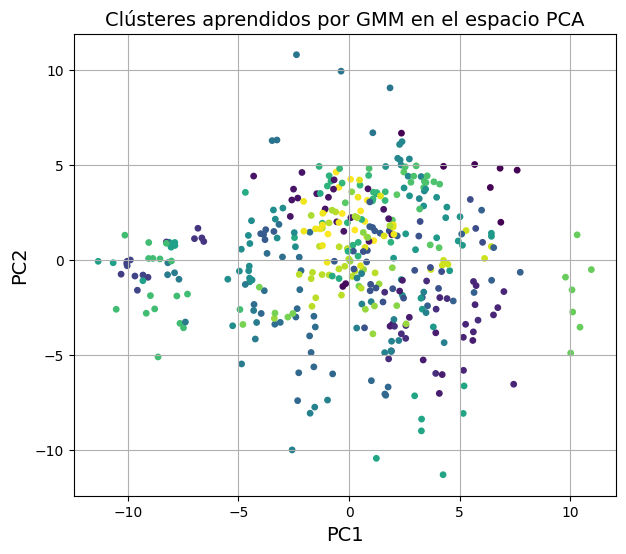

In [ ]:
labels = gmm.predict(X_pca)

plt.figure(figsize=(7, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels,
    s=15
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clústeres aprendidos por GMM en el espacio PCA")
plt.grid()
plt.show()


Ahora interpretaremos esta gráfica.

Tenemos 400 caras y después de aplicar PCA cada cara queda representada como una fila de números en `X_pca`, que tiene 400 filas y 260 columnas. Es decir, cada imagen ya no está descrita por los 4096 píxeles originales, sino por 260 valores que concentran casi toda la información relevante del rostro.

La línea `labels = gmm.predict(X_pca)` hace lo siguiente: para cada cara, el modelo indica cuál de las gaussianas del GMM es la más probable para esa imagen. En otras palabras, el modelo dice “esta cara se parece más a la nube 0”, “a la nube 1”, etc, y guarda ese número. Estos labels no representan identidades ni clases verdaderas, sino solo una asignación útil para visualizar el resultado.

Cuando se usan `X_pca[:, 0]` y `X_pca[:, 1]` se están tomando únicamente los dos primeros componentes principales de cada cara. Esto se hace porque no es posible visualizar un espacio de 260 dimensiones, por lo que se proyectan los datos a dos dimensiones solo con fines gráficos. Los otros 258 valores no se usan en esta gráfica, pero sí fueron utilizados por el GMM durante el entrenamiento.

En `plt.scatter(...)` se dibuja un punto por cada cara. La posición del punto depende de sus valores en las dos primeras componentes principales, y el color depende del label asignado por el GMM. De esta forma cada punto representa visualmente a una imagen, aunque solo se muestre dos digitos del total.

Si dos puntos aparecen cerca en la gráfica significa que esas caras son similares en el espacio PCA, al menos según las dos primeras componentes. Si están lejos, sus representaciones difieren más en esas direcciones principales. La mezcla de colores y la falta de fronteras claras es esperable ya que el GMM no produce separaciones duras, sino que modela regiones de mayor probabilidad que pueden superponer. 

**CONCLUSION**: La gráfica muestra que los puntos no están distribuidos al azar sino que se concentran en ciertas zonas. Esto indica que tras aplicar PCA las caras siguen teniendo una foma con sentido y que la reducción dimensional no eliminó la información importante.

<h1 style="color:#4FC3F7;">4. Generación de nuevos rostros con el Gaussian Mixture Model </h1>

Hasta ahora el GMM solo había servido para mirar los datos, o sea entender cómo están distribuidas las caras en el espacio PCA. En esta etapa pasa algo distinto y más interesante, **el modelo ya no solo observa** sino que puede crear cosas nuevas. Esto es lo que se llama que el modelo sea **generativo**. A diferencia de K-Means que solo agrupa puntos que ya existen el GMM aprende una especie de *mapa estadístico* de cómo suelen ser los rostros.

Cuando llamamos a `sample()` el modelo no está copiando ninguna imagen ni mezclando píxeles, lo que hace es elegir al azar una de las nubes que aprendió, de las 40,  y genera un nuevo punto dentro de esa nube siguiendo sus reglas estadísticas. Ese nuevo punto es simplemente una lista de números, pero esos números recordemos que respetan los patrones del dataset, tales como las característcias especiales de los rostros.

**Ese punto generado vive todavía en el espacio PCA** así que no es una imagen que podamos ver. *Es como si tuviéramos la receta de una cara pero no la cara dibujada*. Para convertir esa receta en una imagen real usamos `inverse_transform()`. Esta función hace el camino inverso al PCA, toma esos números y los transforma otra vez en una **imagen de 4096 píxeles** combinando los componentes faciales que el modelo aprendio.

El resultado final es una cara nueva que no estaba en el dataset original. **No es una copia de ninguna imagen existente pero tampoco es algo totalmente al azar**. Es una cara admisible porque fue generada usando las mismas reglas estadísticas que describen a las caras reales. Estamos conectando un modelo matemático con imágenes visibles y esto claramente muestra que el GMM no solo organiza datos sino que realmente aprendió cómo se estructuran los rostros.

In [ ]:
# Generar nuevos puntos en el espacio PCA
X_new_pca, _ = gmm.sample(n_samples=20)

# Reconstruir imágenes en el espacio original
X_new = pca.inverse_transform(X_new_pca)


En este punto se completa todo el flujo del modelo. El GMM ya aprendió cómo se distribuyen los rostros en el espacio PCA y ahora le pedimos que genere ejemplos nuevos usando esa información. Cuando se ejecuta `gmm.sample(n_samples=20)` el modelo crea 20 puntos nuevos siguiendo las mismas reglas estadísticas que aprendio de los datos reales. Estos puntos no vienen del dataset original ni son combinaciones de imágenes existentes, son resultados nuevos que respetan la estructura general de caras.

El resultado de `sample()` son vectores en el espacio PCA, o sea listas de números que indican cómo se combinan los componentes principales. Por eso todavía no pueden verse como imágenes. En la `línea X_new = pca.inverse_transform(X_new_pca)` ocurre algo clave, se deshace la reducción dimensional y esos vectores vuelven al espacio original de 4096 píxeles.

Ahora `X_new` tiene exactamente el mismo formato que las imágenes originales del dataset aunque no corresponda a ninguna cara real. Al mostrar estas imágenes se puede evaluar directamente si el modelo aprendió patrones faciales razonables o si solo está generando ruido. Si las caras se ven razonables con estructura y rasgos reconocibles, es una señal clara de que el modelo capturó la distribución real de los datos.

Por eso el uso conjunto de `sample()` e `inverse_transform()` nos permiten la comprensión del modelo y de su funcionamiento completo.

Veamos las imagenes:

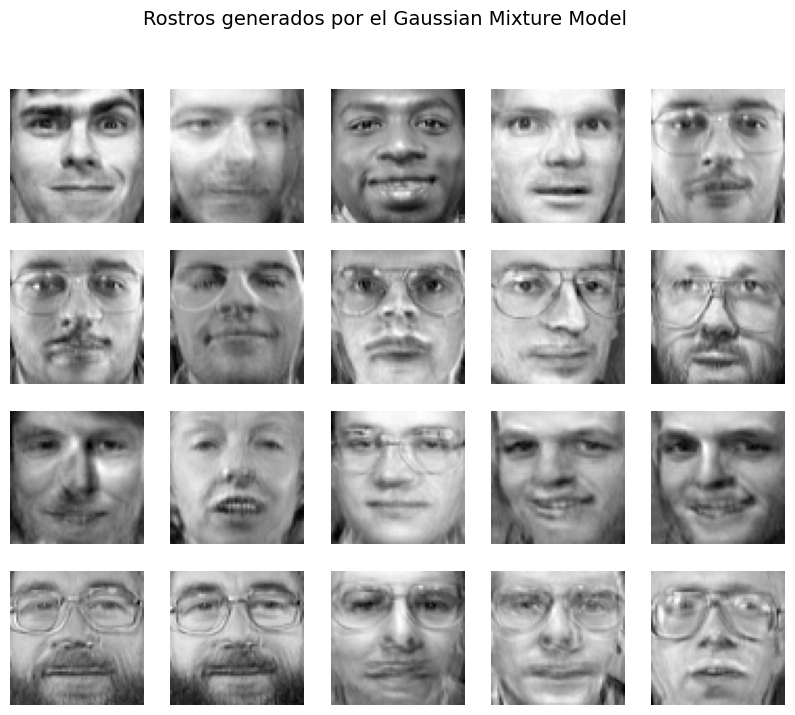

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

for ax, image in zip(axes.ravel(), X_new):
    ax.imshow(image.reshape(64, 64), cmap="gray")
    ax.axis("off")

plt.suptitle("Rostros generados por el Gaussian Mixture Model", fontsize=14)
plt.show()


*Las caras son muy chistosas ajajaj*

Lo que hace este codigo tomar los rostrosnuevos que ya generé con `X_new` y organizarlos de forma ordenada para poder evaluarlos.

La línea `plt.subplots(4, 5, figsize=(10, 8))` crea una cuadrícula de 4 filas por 5 columnas, que será el espacio para mostrar 20 imágenes que coinciden exactamente con los 20 rostros que generamos con `gmm.sample(n_samples=20)`. `axes` será la lista con esos 20 espacios (como 20 cuadritos vacíos), pero es una matriz 4×5 de espacios para dibujar.

Aquí aparece `axes.ravel()`. `ravel()` lo que hace es aplastar `axe` y convertirla en una sola lista. Después de usar `ravel()` tienes una lista con los 20 espacios de dibujo uno detrás de otro, lo que hace mucho más fácil recorrerlos en un for.

La línea `for ax, image in zip(axes.ravel(), X_new)` junta dos cosas al mismo tiempo *(esto lo hace `zip`)*. Por un lado toma un espacio de la figura `(ax)` y por el otro toma una cara generada `(image)`. En cada vuelta del bucle una cara se dibuja en un espacio distinto. Así la primera cara va al primer cuadro, la segunda al segundo y así hasta completar los 20.

Dentro del bucle, `ax.imshow(image.reshape(64, 64), cmap="gray")` es lo que realmente dibuja la imagen. El `reshape(64, 64)` convierte el vector de 4096 números en una imagen cuadrada de 64 x 64 e `imshow` la muestra como una foto en escala de grises. Luego `ax.axis("off")` simplemente quita los ejes, los números y los bordes para que solo se vea la cara.

Cuando finalmente llamamos a `plt.show()` se muestra toda la figura completa con las 20 caras generadas. Cada una de esas caras es diferente y ninguna existía en el dataset original. **Se puede ver que tienen forma humana, ojos, nariz y boca. Aunque esten borrosas, eso significa que el GMM aprendió la estructura general de los rostros y que el PCA permitió reconstruirlos muy bien.**

<h1 style="color:#4FC3F7;">5. Detección de anomalías con Gaussian Mixture Models </h1>

Hasta ahora ya vimos algo clave, el GMM sí puede generar caras nuevas y al mostrarlas vimos que aunque estén borrosa y raras, tienen estructura humana. Eso nos dice que el modelo aprendió "cómo suelen verse las caras".
**Apartir de aca es donde iniciamos esta nueva etapa**

Ya no queremos generar caras, sino responder esta pregunta: **¿Las imagenes son normales según lo que el modelo aprendió o es rara?**. Para eso aparece `score_samples()`.

A `score_samples()` le damos una imagen y nos devuelve un número. Ese número indica qué tan bien esa imagen encaja con lo que el modelo considera "normal". No dice "si" o "no", tampoco clasifica ni usano usa etiquetas. *Solo da un puntaje.* Ese puntaje es lo que se llama <span style="color:#FFEB3B; font-weight:bold;"> log-probabilidad </span>. Si el número es menos negativo la imagen es más normal, pero si el número es muy negativo, la imagen es más rara. 

Hasta este punto ya contamos con un Gaussian Mixture Model entrenado para aprender cómo lucen los rostros “normales” del dataset Olivetti en un espacio reducido mediante PCA. El objetivo ahora es comprobar si el modelo es capaz de detectar cuándo una imagen se aleja claramente de ese patrón aprendido,o sea si puede identificar datos raros.

Para ello se generaron anomalías artificiales a partir de imágenes reales modificándolas de forma controlada mediante un ruido intenso. Estas anomalías no corresponden a personas nuevas sino a versiones alteradas de caras que rompen la estructura estadística del conjunto original. Eso nos permitirá evaluar si el GMM asigna correctamente probabilidades muy bajas a este tipo de datos.

In [ ]:
import numpy as np

# Tomamos algunas imágenes reales
X_base = X[:10]

# Anomalia 1: ruido fuerte
X_noise = np.clip(
    X_base + 0.6 * np.random.randn(*X_base.shape),
    0, 1
)

# Anomalia 2: imágenes muy oscuras
X_dark = np.clip(
    X_base * 0.2,
    0, 1
)

# Anomaliaa 3: borrar bloques (estructuralmente no rostro)
X_block = X_base.copy()
X_block[:, 2000:3000] = 0  # destruimos una región grande

# Juntamos anomalías
X_anomaly = np.vstack([X_noise, X_dark, X_block])


En primer lugar se seleccionó un pequeño subconjunto de imágenes directamente desde el data set, y a partir de ellas generaremos tres tipos de anomalías: imágenes con ruido fuerte, imágenes oscurecidas y caras con regiones completas anuladas, lo que rompe la coherencia de las cara. Estas nuevas imágenes ya no cumplen con las características faciales que el modelo aprendió durante el entrenamiento.

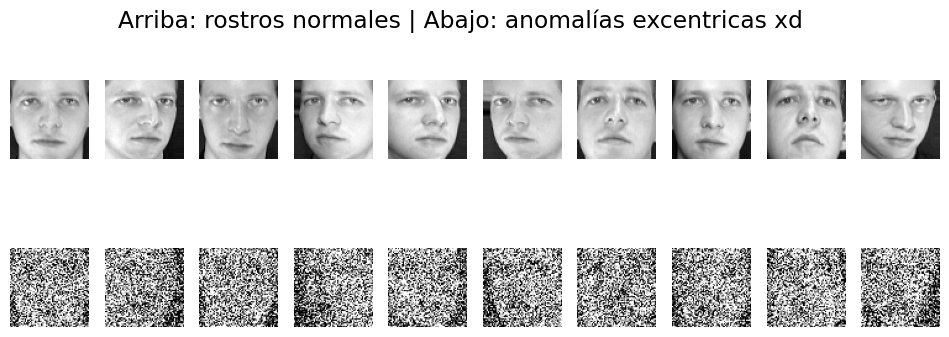

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 10, figsize=(12, 4))

for i in range(10):
    axes[0, i].imshow(X_base[i].reshape(64, 64), cmap="gray")
    axes[0, i].axis("off")
    axes[1, i].imshow(X_anomaly[i].reshape(64, 64), cmap="gray")
    axes[1, i].axis("off")

plt.suptitle("Arriba: rostros normales | Abajo: anomalías excentricas xd")
plt.show()


Es aqúi donde se muestran la comparativa.

Una vez generadas las anomalías, tanto los rostros normales como las imágenes anómalas las llevamno al mismo espacio PCA que creamos anteiormete :D., así garantizamos que la comparación se realiza en el mismo dominio estadístico. Posteriormente el Gaussian Mixture Model asignó a cada muestra una log-verosimilitud que mide qué tan probable es que dicha imagen haya sido generada por la distribución de rostros normalesque aprendió antes.

In [ ]:
X_base_pca = pca.transform(X_base)
X_anomaly_pca = pca.transform(X_anomaly)

scores_normal = gmm.score_samples(X_base_pca)
scores_anomaly = gmm.score_samples(X_anomaly_pca)


El resultado se observa claramente en los histogramas de log-verosimilitud

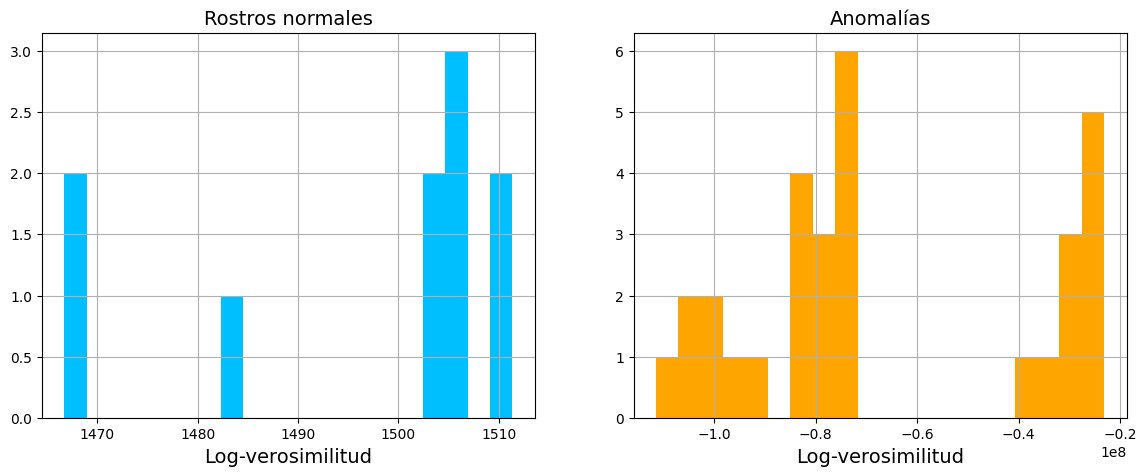

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(scores_normal, bins=20, color="deepskyblue")
axs[0].set_title("Rostros normales")
axs[0].set_xlabel("Log-verosimilitud")

axs[1].hist(scores_anomaly, bins=20, color="orange")
axs[1].set_title("Anomalías")
axs[1].set_xlabel("Log-verosimilitud")

for ax in axs:
    ax.grid()

plt.show()




**Los rostros normales presentan valores altos y concentrados en un rango estrecho, lo que indica que el modelo los reconoce como ejemplos coherentes con la distribución aprendida, mientras que las anomalías reciben valores extremadamente bajos,  reflejando que estadísticamente son incompatibles con el modelo de rostros. Esta separación tan marcada entre ambas distribuciones confirma que el GMM combinado con PCA no solo modela la estructura global del conjunto de datos, sino que también puede utilizarse eficazmente para detección de anomalías en espacios de alta dimensión.**

Creo que fue un ejemplo muy exagerado, las modificaciones fueron muy fuertes. Haremos el mismo proceso pero esta vez con arreglos menos fuertes.

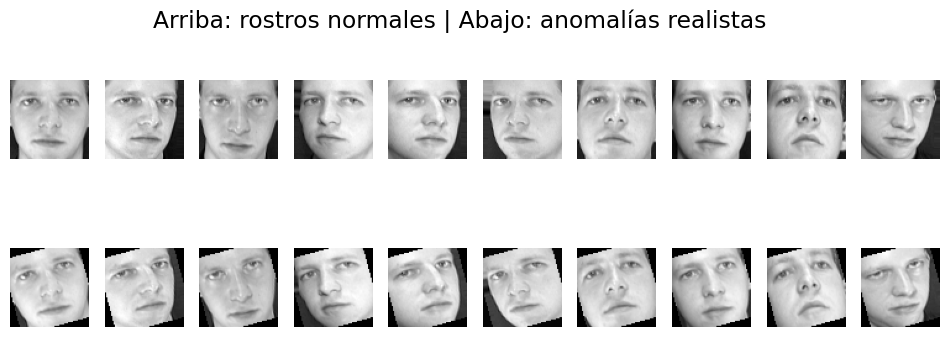

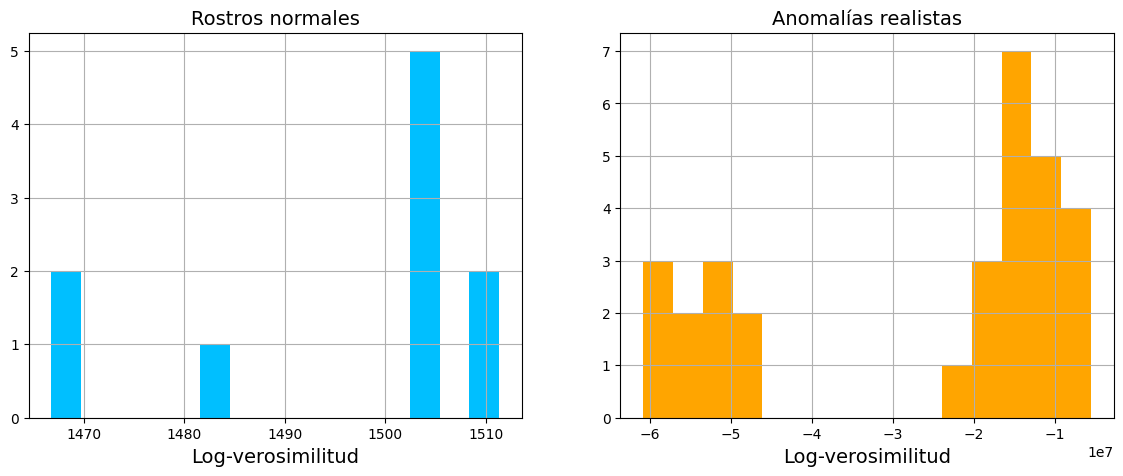

Normal: 1466.7035 1511.3708
Anomaly: -6.090482e+07 -5.4952455e+06


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate



# 1. Seleccionamos rostros reales

X_base = X[:10]  # rostros normales


# 2. Generamos anomalías suaves


# Rotación leve
X_rot = np.array([
    rotate(img.reshape(64, 64), angle=15, reshape=False).reshape(-1)
    for img in X_base
])

# Volteo horizontal
X_flip = np.array([
    np.fliplr(img.reshape(64, 64)).reshape(-1)
    for img in X_base
])

# Oscurecimiento moderado
X_dark = np.clip(X_base * 0.6, 0, 1)

# Juntamos todas las anomalías
X_anomaly = np.vstack([X_rot, X_flip, X_dark])


# 3. Visualización

fig, axes = plt.subplots(2, 10, figsize=(12, 4))

for i in range(10):
    axes[0, i].imshow(X_base[i].reshape(64, 64), cmap="gray")
    axes[0, i].axis("off")
    axes[1, i].imshow(X_anomaly[i].reshape(64, 64), cmap="gray")
    axes[1, i].axis("off")

plt.suptitle("Arriba: rostros normales | Abajo: anomalías realistas")
plt.show()


# 4. Proyección a PCA

X_base_pca = pca.transform(X_base)
X_anomaly_pca = pca.transform(X_anomaly)


# 5. Evaluación con GMM

scores_normal = gmm.score_samples(X_base_pca)
scores_anomaly = gmm.score_samples(X_anomaly_pca)


# 6. Histogramas comparativos

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(scores_normal, bins=15, color="deepskyblue")
axs[0].set_title("Rostros normales")
axs[0].set_xlabel("Log-verosimilitud")

axs[1].hist(scores_anomaly, bins=15, color="orange")
axs[1].set_title("Anomalías realistas")
axs[1].set_xlabel("Log-verosimilitud")

for ax in axs:
    ax.grid()

plt.show()


# 7. Rangos numéricos

print("Normal:", scores_normal.min(), scores_normal.max())
print("Anomaly:", scores_anomaly.min(), scores_anomaly.max())


En esta etapa se utiliza el modelo de Gaussian Mixture Model (GMM) para evaluar qué tan "normales" o "extrañas" son ciertas imágenes de rostros. El modelo no clasifica directamente, sino que asigna a cada imagen un valor llamado log-verosimilitud, que indica qué tan bien esa imagen encaja dentro de lo que el modelo aprendió a partir de los rostros reales. Es importante notar que estos valores no están entre 0 y 1, sino que pueden ser números grandes, positivos o negativos, y lo que realmente importa es compararlos entre sí.

En el caso de los rostros normales, los valores obtenidos son relativamente altos y están agrupados en un rango pequeño. Esto significa que el modelo reconoce estas imágenes como similares a las que vio durante el entrenamiento, ya que conservan la estructura típica de un rostro humano. En el histograma esto se refleja como una distribución compacta y bien definida.

Por otro lado, cuando se evalúan las imágenes anómalas, como rostros rotados, volteados u oscurecidos, los valores de log-verosimilitud cae y aparecen números muy negativos, incluso del orden de −10⁷. Aunque visualmente estas imágenes todavía parecen rostros, desde el punto de vista estadístico se alejan bastante de la distribución aprendida por el modelo. Esto provoca que el GMM les asigne una probabilidad extremadamente baja, lo cual se traduce en esos valores tan negativos. En el histograma, estas anomalías aparecen claramente separadas de los rostros normales.

**Esta separación demuestra que el modelo es capaz de distinguir entre imágenes que siguen el patrón de un rostro humano y aquellas que se desvían de él, cumpliendo así el objetivo de la detección de anomalías.**

<h1 style="color:#4FC3F7;">6. Conclusioenes </h1>

En este proyecto se logró entrenar un modelo de `Gaussian Mixture Model` sobre el conjunto de rostros de Olivetti, utilizando `PCA` para reducir la dimensionalidad y hacer el modelo estable y eficiente. A través de esto fue posible modelar la distribución de las caras reales y detectar imágenes anómalas asignándoles probabilidades muy bajas, lo cual se pudo observar claramente mediante visualizaciones e histogramas. Esto demuestra que los modelos probabilísticos no solo sirven para agrupar datos, sino también para entender qué tan "normal" o "extraño" es un dato dentro de un conjunto.

A partir de este punto podriamos escalar mas el proyecto. Por ejemplo se podría explorar `DBSCAN` que es un método de clustering diferente porque no se necesita fijar el número de grupos previamente, y es especialmente bueno para detectar puntos raros o aislados. **Esto permitiría comparar cómo un método basado en densidad identifica anomalías frente a un modelo probabilístico como GMM.**

Otra posible extensión sería estudiar con más detalle cuántos componentes o "nubes" gaussianas usar en el modelo. En este proyecto ese número se eligió de forma simple, pero existen criterios como `AIC` y `BIC` que ayudan a tomar esa decisión de manera más objetiva los cuales buscan un equilibrio entre un modelo que explique bien los datos y que no sea  algo inncesario ni complejo.

También sería interesante probar un `Bayesian Gaussian Mixture Model`, que es una variante más flexible del GMM tradicional. Este tipo de modelo puede ajustar automáticamente cuántos componentes son realmente necesarios y evitar que el modelo se vuelva demasiado complejp.

**Este trabajo no solo cumple con los objetivos planteados sino que también sienta una base para seguir explorando técnicas de aprendizaje no supervisado.**